#LIBERARY

In [535]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
import missingno as msng
#---------------------------------------------------------------------------------------------->EXCEPTION_WARNING
import warnings
warnings.filterwarnings("ignore")
#---------------------------------------------------------------------------------------------->RECURSIVE_FEATURE_SELECTION(RFE-WRAPPER)
from sklearn.feature_selection import RFE #recursive feature elimination
#---------------------------------------------------------------------------------------------->F_REGRESSION
from sklearn.feature_selection import SelectKBest,f_regression
#---------------------------------------------------------------------------------------------->CHI2
from sklearn.feature_selection import SelectKBest,chi2
#---------------------------------------------------------------------------------------------->MUTUAL_INFO_CLASSIFY
from sklearn.feature_selection import mutual_info_classif
#---------------------------------------------------------------------------------------------->ANNOVA_F_CLASSIFY
from sklearn.feature_selection import SelectKBest, f_classif
#---------------------------------------------------------------------------------------------->PCA
from sklearn.decomposition import PCA
#---------------------------------------------------------------------------------------------->TSNE
from sklearn.manifold import TSNE
#---------------------------------------------------------------------------------------------->CLASSIFIER_MODEL(KNN)
from sklearn.neighbors import KNeighborsClassifier
#---------------------------------------------------------------------------------------------->CLASSIFICATION_REPORT
from sklearn.metrics import classification_report
#---------------------------------------------------------------------------------------------->EVALUATION_CLASSIFICATION
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

#Read-data

In [536]:
df=pd.read_csv('/content/titanic dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [537]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [538]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [539]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [540]:
corr = df.corr()
corr.iloc[:,0].sort_values(ascending=False)

PassengerId    1.000000
Age            0.036847
Fare           0.012658
Parch         -0.001652
Survived      -0.005007
Pclass        -0.035144
SibSp         -0.057527
Name: PassengerId, dtype: float64

#VISUALIZATION

In [541]:
px.imshow(df.corr(),title="Correlation Plot of the titanic survived")

In [542]:
fig = px.scatter(df, x="Pclass", y="Survived", color="Sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")# color is hue
fig.show()

In [543]:
fig = px.bar(df, x="Embarked", y="Survived", color="Sex", barmode="group")#color is a hue & Embarked is hue
fig.show()

In [544]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [545]:
fig = px.scatter_matrix(df, dimensions=["Pclass", "Age", "SibSp", "Parch"], color="Survived")
fig.show()

In [546]:
fig = px.ecdf(df, x="Survived", color="Sex")
fig.show()

In [547]:
fig = px.violin(df, y="Survived", x="Embarked", color="Sex", box=True, points="all", hover_data=df.columns)
fig.show()

In [548]:
fig = px.density_heatmap(df, x="Survived", y="Fare", marginal_x="rug", marginal_y="histogram")
fig.show()

#ENCODING

In [549]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex']) # if multi features
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,3,NaN,1,2,23.4500,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1


#EDA

In [550]:
df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_female      0
Sex_male        0
dtype: int64

In [551]:
df.dropna(inplace=True)

In [552]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

#SPLIT_DATA

In [553]:
x=df.loc[:,df.columns != 'Survived']
y=df['Survived']

In [554]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.2,random_state=42)

##APPLY_MODEL

In [555]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [556]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [557]:
GRID_SEARCH_N= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [558]:
GRID_SEARCH_RESULT_N= GRID_SEARCH_N.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [559]:
GRID_SEARCH_RESULT_N.best_score_*100

74.5461060678452

In [560]:
GRID_SEARCH_RESULT_N.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [561]:
y_pred_N= GRID_SEARCH_N.predict(x_test)

In [562]:
print(classification_report(y_test, y_pred_N))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        87
           1       0.64      0.57      0.60        56

    accuracy                           0.71       143
   macro avg       0.69      0.68      0.69       143
weighted avg       0.70      0.71      0.70       143



In [563]:
ROC_N=roc_auc_score(y_test, y_pred_N)*100
ROC_N

68.22660098522168

In [564]:
score_test_N=accuracy_score(y_pred_N,y_test)*100
print("Accuracy for our test dataset with tuning is : {:.2f}%".format(score_test_N))
recall_N=recall_score(y_pred_N,y_test)*100
print("Recall for our test dataset with tuning is  : {:.2f}%".format(recall_N))
precesion_N=precision_score(y_pred_N,y_test)*100
print("Precesion for our test dataset with tuning is  : {:.2f}%".format(precesion_N))

Accuracy for our test dataset with tuning is : 70.63%
Recall for our test dataset with tuning is  : 64.00%
Precesion for our test dataset with tuning is  : 57.14%


#PEARSON_CORRELATION(F1_REGRESSION)_(CLASSIFICATION_REGRESSION)

In [565]:
FREG=SelectKBest(f_regression,k=8)
FREG.fit(x_train ,y_train)

x_train_F_REG=FREG.transform(x_train)
x_valid_F_REG=FREG.transform(x_valid)
x_test_F_REG=FREG.transform(x_test)

# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

##SELECTED_FEATURES

In [566]:
mask = FREG.get_support()
mask

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True])

In [567]:
selected_feature_names_F_REG = pd.DataFrame(x_train).columns[mask]
selected_feature_names_F_REG

Index(['Pclass', 'Age', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [568]:
# fsm.get_feature_names_out()

##APPLY_MODEL

In [569]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [570]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [571]:
GRID_SEARCH_REG= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [572]:
GRID_SEARCH_RESULT_REG= GRID_SEARCH_REG.fit(x_train_F_REG, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [573]:
GRID_SEARCH_RESULT_REG.best_score_*100

73.45437171524128

In [574]:
GRID_SEARCH_RESULT_REG.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [575]:
y_pred_REG= GRID_SEARCH_RESULT_REG.predict(x_test_F_REG)

In [576]:
print(classification_report(y_test, y_pred_REG))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        87
           1       0.64      0.57      0.60        56

    accuracy                           0.71       143
   macro avg       0.69      0.68      0.69       143
weighted avg       0.70      0.71      0.70       143



In [577]:
ROC_REG=roc_auc_score(y_test, y_pred_REG)*100
ROC_REG

68.22660098522168

In [578]:
score_test_F_REG=accuracy_score(y_pred_REG,y_test)*100
print("Accuracy for our test dataset with tuning is F_REGRESSION : {:.2f}%".format(score_test_F_REG))
recall_F_REG=recall_score(y_pred_REG,y_test)*100
print("Recall for our test dataset with tuning is F_REGRESSION : {:.2f}%".format(recall_F_REG))
precesion_F_REGL=precision_score(y_pred_REG,y_test)*100
print("Precesion for our test dataset with tuning is F_REGRESSION : {:.2f}%".format(precesion_F_REGL))

Accuracy for our test dataset with tuning is F_REGRESSION : 70.63%
Recall for our test dataset with tuning is F_REGRESSION : 64.00%
Precesion for our test dataset with tuning is F_REGRESSION : 57.14%


#CHi-square(chi2)-(CLASSIFICATION_REGRESSION)

In [579]:
CHI2=SelectKBest(chi2,k=8)#K=8 MEAN BEST OF CORRELATION OF FEATURES SELECTED
CHI2.fit(x_train ,y_train)
x_train_selected_CHI2=CHI2.transform(x_train)
x_valid_selected_CHI2=CHI2.transform(x_valid)
x_test_selected_CHI2=CHI2.transform(x_test)

# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

In [580]:
mask = CHI2.get_support()
mask

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True])

In [581]:
selected_feature_names_CHI2 = pd.DataFrame(x_train).columns[mask]
selected_feature_names_CHI2

Index(['Pclass', 'Age', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S',
       'Sex_female', 'Sex_male'],
      dtype='object')

##APPLY_MODEL

In [582]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [583]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [584]:
GRID_SEARCH_CHI2= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [585]:
GRID_SEARCH_RESULT_CHI2= GRID_SEARCH_CHI2.fit(x_train_selected_CHI2, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [586]:
GRID_SEARCH_RESULT_CHI2.best_score_

0.7345437171524128

In [587]:
GRID_SEARCH_RESULT_CHI2.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [588]:
y_pred_CHI2= GRID_SEARCH_RESULT_CHI2.predict(x_test_selected_CHI2)

In [589]:
print(classification_report(y_test, y_pred_CHI2))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        87
           1       0.64      0.57      0.60        56

    accuracy                           0.71       143
   macro avg       0.69      0.68      0.69       143
weighted avg       0.70      0.71      0.70       143



In [590]:
ROC_CHI2=roc_auc_score(y_test, y_pred_CHI2)*100
ROC_CHI2

68.22660098522168

In [591]:
score_test_CHI2=accuracy_score(y_pred_CHI2,y_test)*100
print("Accuracy for our test dataset with tuning is CHI2 : {:.2f}%".format(score_test_CHI2))
recall_CHI2=recall_score(y_pred_CHI2,y_test)*100
print("Recall for our test dataset with tuning is CHI2 : {:.2f}%".format(recall_CHI2))
precesion_CHI2L=precision_score(y_pred_CHI2,y_test)*100
print("Precesion for our test dataset with tuning is CHI2 : {:.2f}%".format(precesion_CHI2L))

Accuracy for our test dataset with tuning is CHI2 : 70.63%
Recall for our test dataset with tuning is CHI2 : 64.00%
Precesion for our test dataset with tuning is CHI2 : 57.14%


#MUTUAL_INFORMATION_CLASSIFY (CLASSIFICATION)

In [592]:
MI=SelectKBest(mutual_info_classif,k=8)
MI.fit(x_train ,y_train)
x_train_selected_MI=MI.transform(x_train)
x_valid_selected_MI=MI.transform(x_valid)
x_test_selected_MI=MI.transform(x_test)
# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

In [593]:
mask = MI.get_support()
mask

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True])

In [594]:
selected_feature_names_MI = pd.DataFrame(x_train).columns[mask]
selected_feature_names_MI

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [595]:
# fsm.get_feature_names_out()

##APPLY_MODEL

In [596]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [597]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [598]:
GRID_SEARCH_MI= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [599]:
GRID_SEARCH_RESULT_MI= GRID_SEARCH_MI.fit(x_train_selected_MI, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [600]:
GRID_SEARCH_RESULT_MI.best_score_

0.7455088389870999

In [601]:
GRID_SEARCH_RESULT_MI.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [602]:
y_pred_MI= GRID_SEARCH_RESULT_MI.predict(x_test_selected_MI)

In [603]:
print(classification_report(y_test, y_pred_MI))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        87
           1       0.63      0.59      0.61        56

    accuracy                           0.71       143
   macro avg       0.69      0.69      0.69       143
weighted avg       0.70      0.71      0.70       143



In [604]:
ROC_MI=roc_auc_score(y_test, y_pred_MI)*100
ROC_MI

68.54474548440066

In [605]:
score_test_MI=accuracy_score(y_pred_MI,y_test)*100
print("Accuracy for our test dataset with tuning is mutual_info_classif : {:.2f}%".format(score_test_MI))
recall_MI=recall_score(y_pred_MI,y_test)*100
print("Recall for our test dataset with tuning is mutual_info_classif : {:.2f}%".format(recall_MI))
precesion_MI=precision_score(y_pred_MI,y_test)*100
print("Precesion for our test dataset with tuning is mutual_info_classif : {:.2f}%".format(precesion_MI))

Accuracy for our test dataset with tuning is mutual_info_classif : 70.63%
Recall for our test dataset with tuning is mutual_info_classif : 63.46%
Precesion for our test dataset with tuning is mutual_info_classif : 58.93%


#ANNOVA(f_classif)_CLASSIFICATION

In [606]:
ANNOVA=SelectKBest(f_classif,k=8)
ANNOVA.fit(x_train ,y_train)
x_train_selected_ANNOVA=ANNOVA.transform(x_train)
x_valid_selected_ANNOVA=ANNOVA.transform(x_valid)
x_test_selected_ANNOVA=ANNOVA.transform(x_test)
# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

In [607]:
mask = ANNOVA.get_support()
mask

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True])

In [608]:
selected_feature_names_ANNOVA= pd.DataFrame(x_train).columns[mask]
selected_feature_names_ANNOVA

Index(['Pclass', 'Age', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [609]:
# fsm.get_feature_names_out()

##APPLY_MODEL

In [610]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [611]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [612]:
GRID_SEARCH_ANNOVA= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [613]:
GRID_SEARCH_RESULT_ANNOVA= GRID_SEARCH_ANNOVA.fit(x_train_selected_ANNOVA, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [614]:
GRID_SEARCH_RESULT_ANNOVA.best_score_*100

73.45437171524128

In [615]:
GRID_SEARCH_RESULT_ANNOVA.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [616]:
y_pred_ANNOVA= GRID_SEARCH_RESULT_ANNOVA.predict(x_test_selected_ANNOVA)

In [617]:
print(classification_report(y_test, y_pred_ANNOVA))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        87
           1       0.64      0.57      0.60        56

    accuracy                           0.71       143
   macro avg       0.69      0.68      0.69       143
weighted avg       0.70      0.71      0.70       143



In [618]:
ROC_ANNOVA=roc_auc_score(y_test, y_pred_ANNOVA)*100
ROC_ANNOVA

68.22660098522168

In [619]:
score_test_ANNOVA=accuracy_score(y_pred_ANNOVA,y_test)*100
print("Accuracy for our test dataset with tuning is ANNOVA : {:.2f}%".format(score_test_ANNOVA))
recall_ANNOVA=recall_score(y_pred_ANNOVA,y_test)*100
print("Recall for our test dataset with tuning is ANNOVA : {:.2f}%".format(recall_ANNOVA))
precesion_ANNOVA=precision_score(y_pred_ANNOVA,y_test)*100
print("Precesion for our test dataset with tuning is ANNOVA : {:.2f}%".format(precesion_ANNOVA))

Accuracy for our test dataset with tuning is ANNOVA : 70.63%
Recall for our test dataset with tuning is ANNOVA : 64.00%
Precesion for our test dataset with tuning is ANNOVA : 57.14%


#PCA(CLASSIFICATION_REGRESSION)

In [620]:
# recommended to use standard-scaler
# scaler=StandardScaler()
# x_train_sc=scaler.fit_transform(x_train)
# x_valid_sc=scaler.transform(x_valid)
# x_test_sc=scaler.transform(x_test)

##PCA With best k value

Number of components to keep: 2


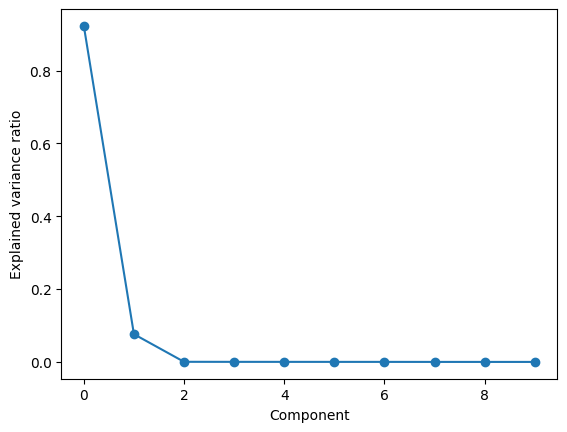

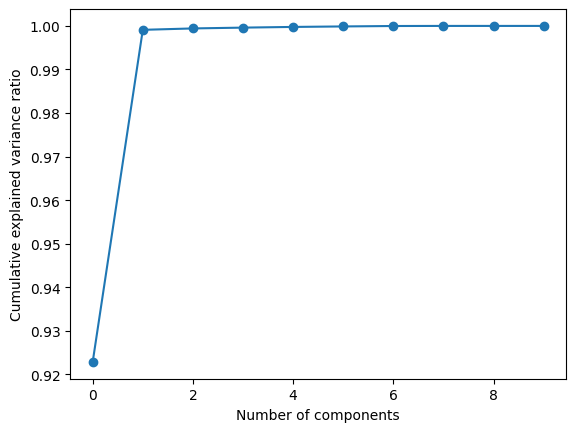

In [621]:
# Create a PCA object with the desired number of components
pca = PCA()

# Fit the PCA object to the training data and transform both the training and test data
x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

# Determine number of components to keep
explained_var_ratio = pca.explained_variance_ratio_

# cumulative sum of the explained variance ratios
cumulative_var_ratio = np.cumsum(explained_var_ratio)

#to find the index of the first cumulative variance ratio that is greater than or equal to 0.95,
#and we add 1 to get the actual number of components to keep.
n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1
print(f"Number of components to keep: {n_components}")

# Plot explained variance ratio
plt.plot(explained_var_ratio, marker='o')
plt.xlabel('Component')
plt.ylabel('Explained variance ratio')
plt.show()

# Plot cumulative explained variance ratio
plt.plot(cumulative_var_ratio, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

In [622]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=8)
# Fit the PCA object to the training data and transform both the training and test data
x_train_selected_PCA= pca.fit_transform(x_train)
x_valid_selected_PCA= pca.transform(x_valid)
x_test_selected_PCA= pca.transform(x_test)

##APPLY_MODEL

In [623]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [624]:
grid_params_KNN= { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [625]:
GRID_SEARCH_PCA= GridSearchCV(KNN, grid_params_KNN, verbose = 1,n_jobs = -1)

In [626]:
GRID_SEARCH_RESULT_PCA= GRID_SEARCH_PCA.fit(x_train_selected_PCA, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [627]:
GRID_SEARCH_RESULT_PCA.best_score_

0.7433110367892977

In [628]:
GRID_SEARCH_RESULT_PCA.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [629]:
y_pred_PCA= GRID_SEARCH_RESULT_PCA.predict(x_test_selected_PCA)

In [630]:
print(classification_report(y_test, y_pred_PCA))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        87
           1       0.63      0.59      0.61        56

    accuracy                           0.71       143
   macro avg       0.69      0.69      0.69       143
weighted avg       0.70      0.71      0.70       143



In [631]:
ROC_PCA=roc_auc_score(y_test, y_pred_PCA)*100
ROC_PCA

68.54474548440066

In [632]:
score_test_PCA=accuracy_score(y_pred_PCA,y_test)*100
print("Accuracy for our test dataset with tuning is PCA : {:.2f}%".format(score_test_PCA))
recall_PCA=recall_score(y_pred_PCA,y_test)*100
print("Recall for our test dataset with tuning is PCA : {:.2f}%".format(recall_PCA))
precesion_PCA=precision_score(y_pred_PCA,y_test)*100
print("Precesion for our test dataset with tuning is PCA : {:.2f}%".format(precesion_PCA))

Accuracy for our test dataset with tuning is PCA : 70.63%
Recall for our test dataset with tuning is PCA : 63.46%
Precesion for our test dataset with tuning is PCA : 58.93%


#EVALUATION_FOR_MI_TSNE(CLASSIFICATION_REGRESSION)

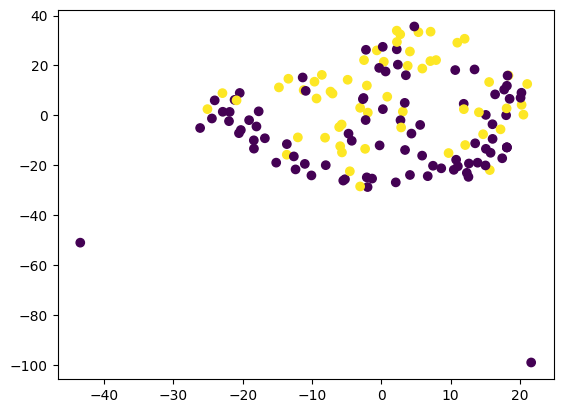

In [633]:
tsne = TSNE(n_components=3, perplexity=10)#perplexity=30 to control the effective number of neighbors used in the algorithm.

# Fit the TSNE object to the data and transform the data
x_train_selected_MI = tsne.fit_transform(x_train)
x_valid_selected_MI = tsne.fit_transform(x_valid)
x_test_selected_MI = tsne.fit_transform(x_test)

# Plot the 2D t-SNE visualization
plt.scatter(x_test_selected_MI[:,0], x_test_selected_MI[:,1], c=y_test)
plt.show()

#'TSNE' object has no attribute 'transform'

#ROC_CURVE_FOR_CURSE_OF_DIMENSIONALITY

Text(0.5, 1.0, 'SCORE_FOR_UNBALANCE_BY_RANDOM_UNDER_SAMPLED')

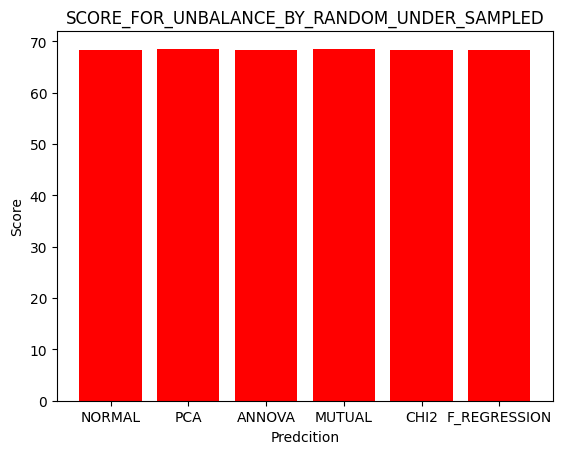

In [634]:
x= ["NORMAL","PCA","ANNOVA","MUTUAL","CHI2","F_REGRESSION"]
y=[ROC_N ,ROC_PCA,ROC_ANNOVA,ROC_MI,ROC_CHI2,ROC_REG]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("SCORE_FOR_UNBALANCE_BY_RANDOM_UNDER_SAMPLED")

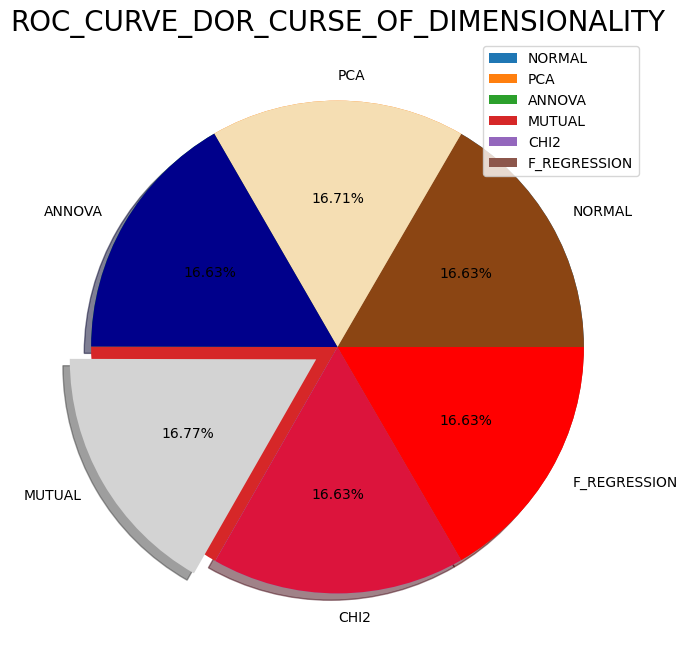

In [ ]:
X= ["NORMAL","PCA","ANNOVA","MUTUAL","CHI2","F_REGRESSION"]
DATA=[68.22660098522168,68.54474548440066,68.22660098522168,68.80131362889983,68.22660098522168,68.22660098522168]
colors = ['saddlebrown', 'wheat', 'darkblue', 'lightgrey','crimson','red']
EXPLOD = [0.0, 0.0, 0.0, 0.1,0.0,0.0]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("ROC_CURVE_DOR_CURSE_OF_DIMENSIONALITY", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()

#ACCURACY_TEST_FOR_CURSE_OF_DIMINSIONALITY

Text(0.5, 1.0, 'SCORE_FOR_CURSE_OF_DIMINSIONALITY_BY_RANDOM_UNDER_SAMPLED')

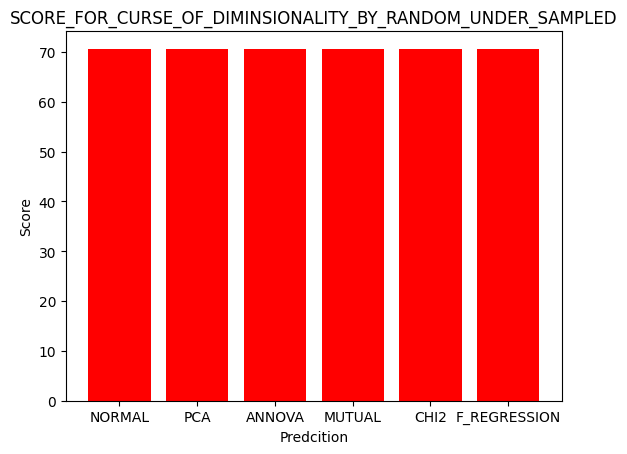

In [635]:
x= ["NORMAL","PCA","ANNOVA","MUTUAL","CHI2","F_REGRESSION"]
y=[score_test_N ,score_test_PCA,score_test_ANNOVA,score_test_MI,score_test_CHI2,score_test_F_REG]
plt.bar(x , y,color='RED')
figsize=(20,30)
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("SCORE_FOR_CURSE_OF_DIMINSIONALITY_BY_RANDOM_UNDER_SAMPLED")

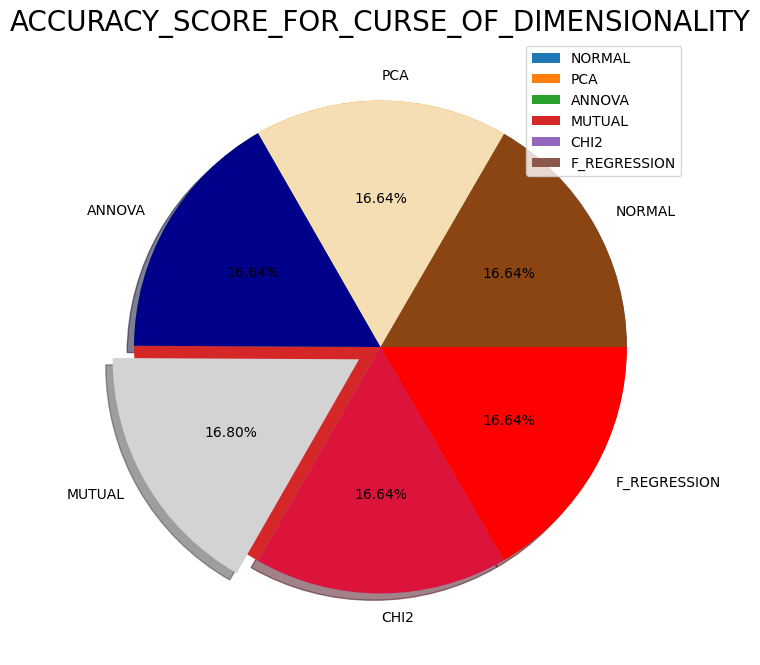

In [639]:
X= ["NORMAL","PCA","ANNOVA","MUTUAL","CHI2","F_REGRESSION"]
DATA=[70.62937062937063,70.62937062937063,70.62937062937063,71.32867132867133,70.62937062937063,70.62937062937063]
colors = ['saddlebrown', 'wheat', 'darkblue', 'lightgrey','crimson','red']
EXPLOD = [0.0, 0.0, 0.0, 0.1,0.0,0.0]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("ACCURACY_SCORE_FOR_CURSE_OF_DIMENSIONALITY", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()